In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import random
from scipy import stats

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample

In [4]:

import pandas as pd

#read the CSV file into a DataFrame
df = pd.read_csv('Salary_Data.csv')

#display the first few rows of the csv file 
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

In [8]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
x = df.drop(["Salary"], axis = True)
y = df["Salary"]

In [10]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [11]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=40)

In [14]:
x_train.shape


(24, 1)

In [15]:
x_test.shape

(6, 1)

/Users/radhikaagarwal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


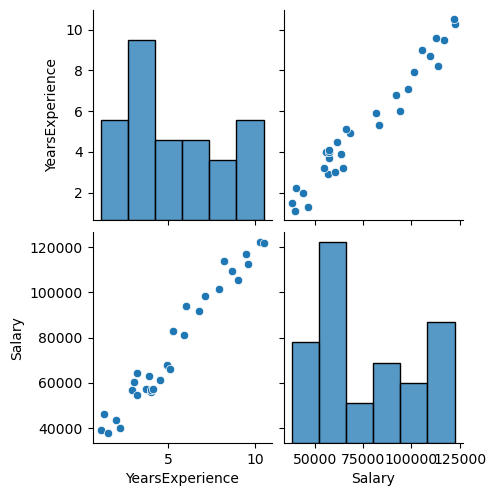

In [19]:
sns.pairplot(df)

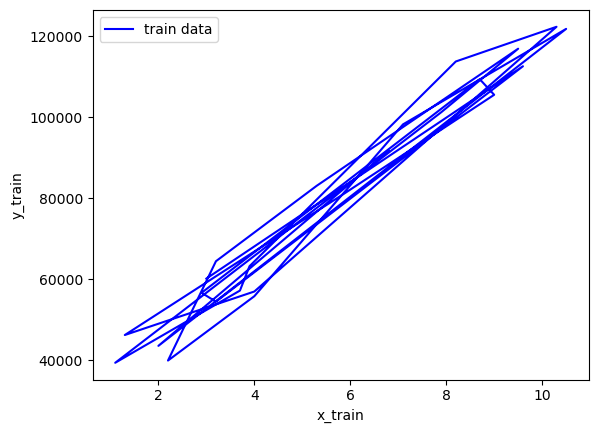

In [22]:
plt.plot(x_train, y_train, 'b', label='train data')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

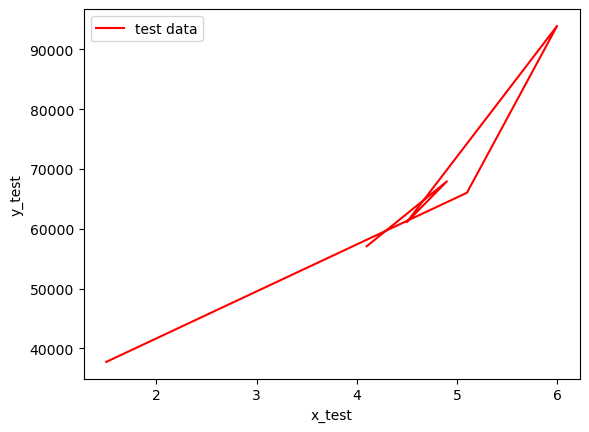

In [23]:
plt.plot(x_test, y_test, 'r', label='test data')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(x_test).round(1)

In [27]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Salary","Predict Salary"])
calculation

,Original Salary,Predict Salary
0,37731.0,41434.1
1,66029.0,74801.3
2,93940.0,83143.1
3,61111.0,69240.1
4,67938.0,72947.6
5,57081.0,65532.7


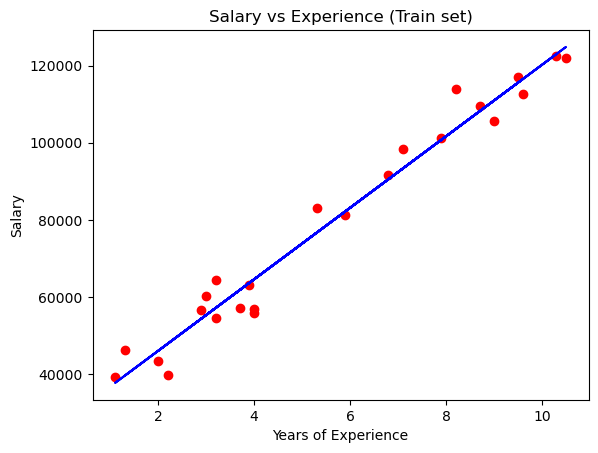

In [30]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

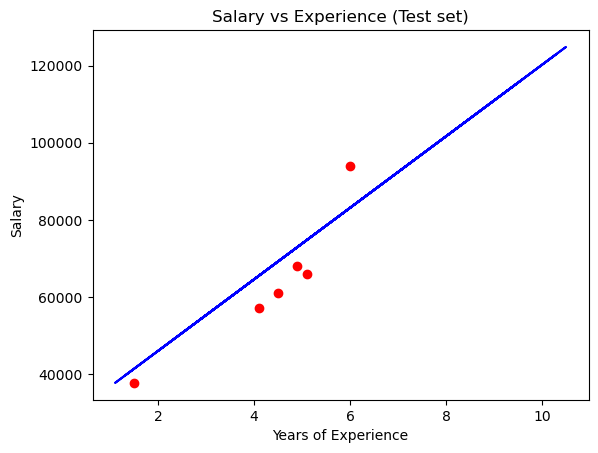

In [32]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()